In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46,6.9,3.3,5.4,223.208333


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1128 non-null   object 
 1   TM      1128 non-null   object 
 2   Tm      1128 non-null   object 
 3   H       1128 non-null   object 
 4   VV      1128 non-null   object 
 5   V       1128 non-null   object 
 6   VM      1128 non-null   object 
 7   PM 2.5  1122 non-null   float64
dtypes: float64(1), object(7)
memory usage: 70.6+ KB


In [7]:
#Transforming my columns to float datatype
cols = list(df.columns)
for col in cols:
    df[col] = pd.to_numeric(df[col], downcast='float',errors='coerce') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1114 non-null   float32
 1   TM      1114 non-null   float32
 2   Tm      1114 non-null   float32
 3   H       1114 non-null   float32
 4   VV      1114 non-null   float32
 5   V       1114 non-null   float32
 6   VM      1105 non-null   float32
 7   PM 2.5  1122 non-null   float32
dtypes: float32(8)
memory usage: 35.4 KB


In [9]:
df.isnull().sum()

T         14
TM        14
Tm        14
H         14
VV        14
V         14
VM        23
PM 2.5     6
dtype: int64

<AxesSubplot:>

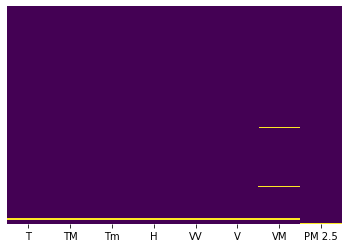

In [11]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df = df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1126
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1103 non-null   float32
 1   TM      1103 non-null   float32
 2   Tm      1103 non-null   float32
 3   H       1103 non-null   float32
 4   VV      1103 non-null   float32
 5   V       1103 non-null   float32
 6   VM      1103 non-null   float32
 7   PM 2.5  1103 non-null   float32
dtypes: float32(8)
memory usage: 43.1 KB


In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

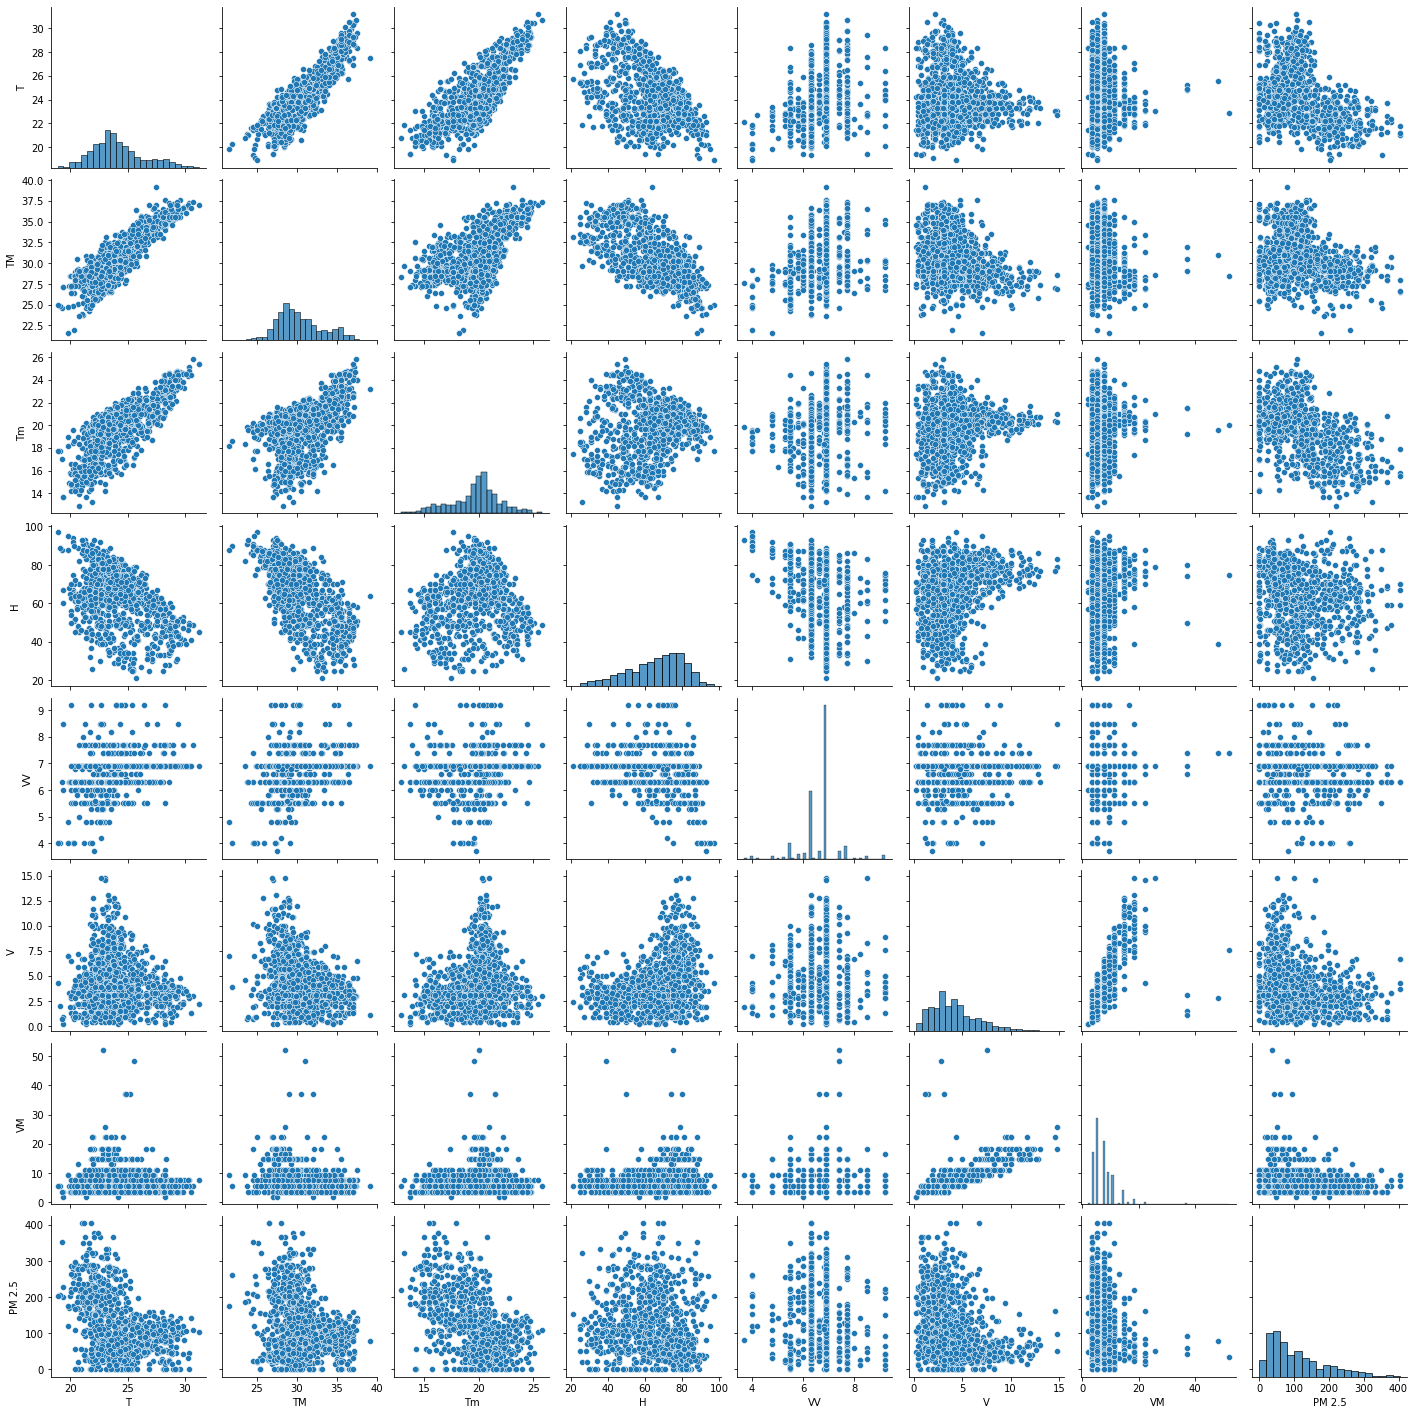

In [15]:
sns.pairplot(df)

In [16]:
df.corr()

,T,TM,Tm,H,VV,V,VM,PM 2.5
T,1.000000,0.869258,0.753944,-0.455387,0.325016,-0.112894,-0.066897,-0.347037
TM,0.869258,1.000000,0.478298,-0.636507,0.287989,-0.290409,-0.201408,-0.162840
Tm,0.753944,0.478298,1.000000,0.156138,0.138933,0.163599,0.141125,-0.514716
H,-0.455387,-0.636507,0.156138,1.000000,-0.274199,0.354845,0.262063,-0.218054
VV,0.325016,0.287989,0.138933,-0.274199,1.000000,0.051324,0.042967,-0.123441
V,-0.112894,-0.290409,0.163599,0.354845,0.051324,1.000000,0.710970,-0.333317
VM,-0.066897,-0.201408,0.141125,0.262063,0.042967,0.710970,1.000000,-0.268927
PM 2.5,-0.347037,-0.162840,-0.514716,-0.218054,-0.123441,-0.333317,-0.268927,1.000000


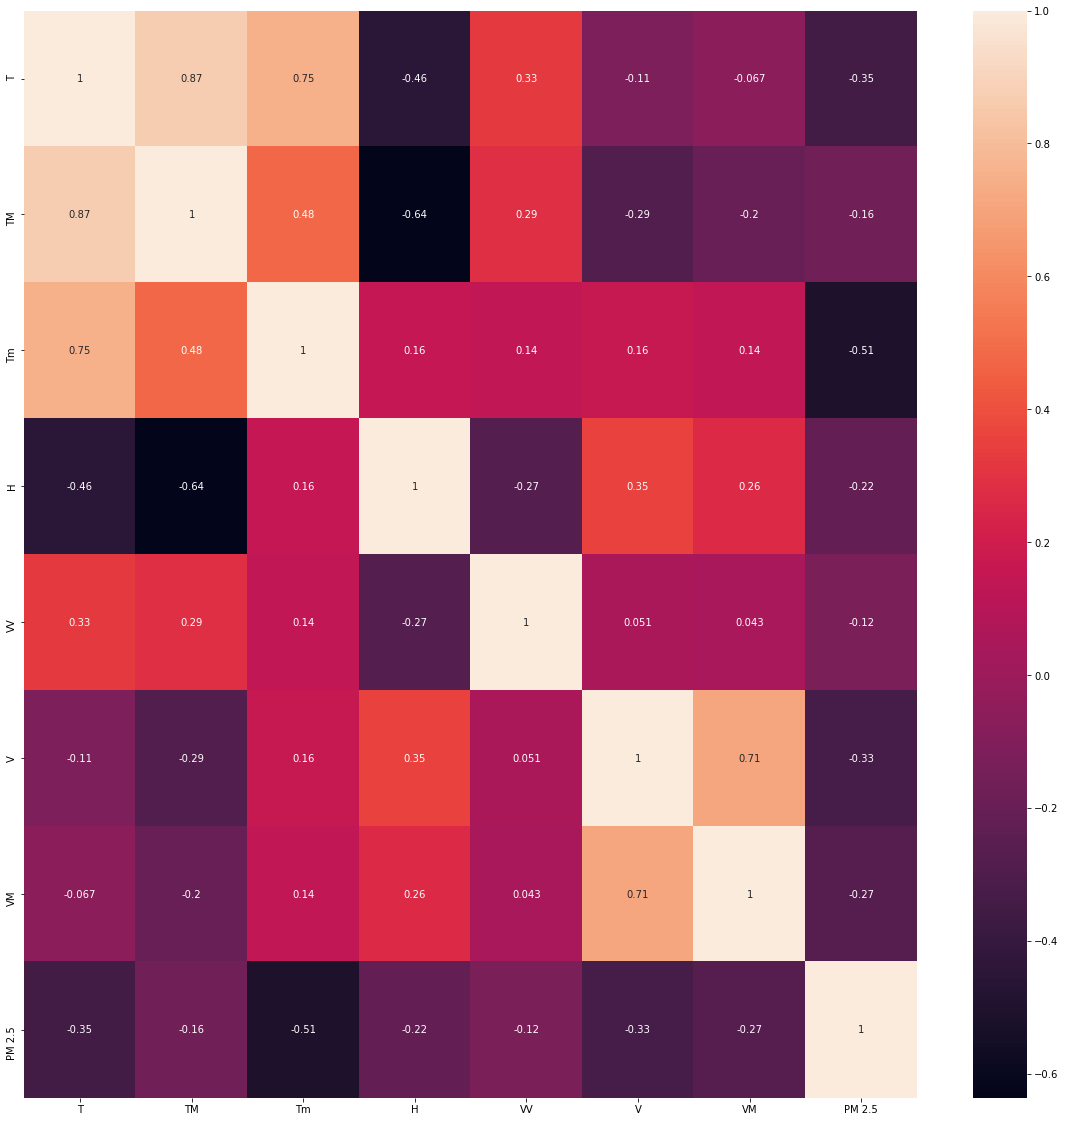

In [17]:
cor_mat = df.corr()
top_corr_features = cor_mat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot=True)

## Feature importance
#### We can select the most important features from dataset using SKlearn ExtraTreeRegressor.
#### it scores each feature in your dataset. The higher the score, the more important your feature.


In [18]:
from sklearn.ensemble import ExtraTreesRegressor

In [19]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [21]:
print(model.feature_importances_)

[0.18750982 0.10812352 0.30124351 0.12831978 0.06648632 0.13870482
 0.06961222]


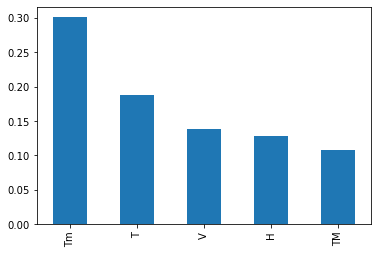

In [25]:
#plot graph of feature importance for better visualization
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(5).plot(kind='bar')
plt.show()

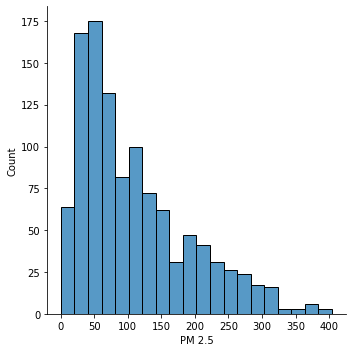

In [27]:
#sns.displot() to see the distribution of the data. it is 
sns.displot(y)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=3)


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
print(f"Coefficient of determination R2 on train set: {lr.score(X_train,y_train)}")

Coefficient of determination R2 on train set: 0.36101608995835355


In [37]:
print(f"Coefficient of determination R2 on test set: {lr.score(X_test,y_test)}")

Coefficient of determination R2 on test set: 0.3416932079219972


In [35]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X,y,cv=5)

In [36]:
score.mean()

0.3077986295167096

## Model Evaluation

In [38]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['coefficient'])
coeff_df

,coefficient
T,-20.888561
TM,-0.742586
Tm,1.761931
H,-2.039446
VV,-5.775484
V,-8.833547
VM,-0.324956


### Interpretation
A unit increase in a variable will lead to a corresponding coefficient value decrease(-ve coefficients) 
or increase(+ve coefficients) in the dependent variable(PM2.5)

In [39]:
prediction = lr.predict(X_test)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

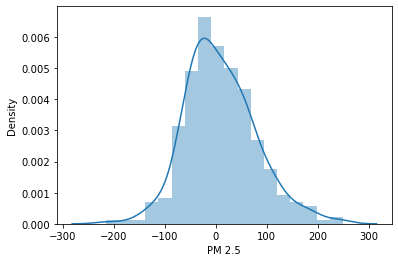

In [41]:
sns.distplot(y_test-prediction)

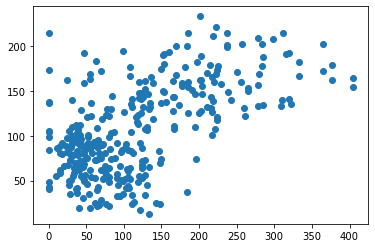

In [42]:
plt.scatter(y_test,prediction)

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [44]:
print('MAE:', mean_absolute_error(y_test,prediction))
print('MSE:', mean_squared_error(y_test,prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction)))

MAE: 54.41375
MSE: 4959.9473
RMSE: 70.426895


In [45]:
import joblib

In [ ]:
model = joblib()